# Vegetation Index Model

The code in this notebook was adapted from __[here](https://github.com/e-sensing/wgiss-py-webinar/blob/master/WGISS_Tech_Webinar.ipynb)__

## Simulate a time series

In [50]:
import math
import numpy as np

n = 46                  # number of observations
f     = 16/365          # 16 observations a year 
# model
y     = np.zeros(n)     # process (true) time series
z     = np.zeros(n)     # data time series
mu    = 3.0             # offset
alpha = 1.2             # amplitude
phi   = math.pi/4       # phase
omega = 2 * math.pi * f # angular frequency

# noise vectors
nu    = np.random.normal(0, math.sqrt(0.1), n)
v     = np.random.uniform(-1, 1, n)

# build the time series
for k in range(0, n):
    y[k] = mu + alpha * math.cos(omega * k + phi) + nu[k]
    z[k] = y[k] * (1 + 0.5 * v[k])
print(y)
print(z)

# Kalman filter
y_est = c1 + c2 * cos(omega_k + c3)
c1 c2 c3 = [1 1 1]

I = np.matrix(np.identity(n), copy=False)
R = 0.5 * I
Q = 0.1 * I       # model error
# gaussian random noise

SyntaxError: invalid syntax (<ipython-input-50-75d80b984c08>, line 27)

## Get time series of vegetation index

,evi,ndvi
2000-02-18,0.6439,0.7418
2000-03-05,0.4600,0.9092
2000-03-21,0.5516,0.9025
2000-04-06,0.4937,0.8850
2000-04-22,0.5220,0.8578


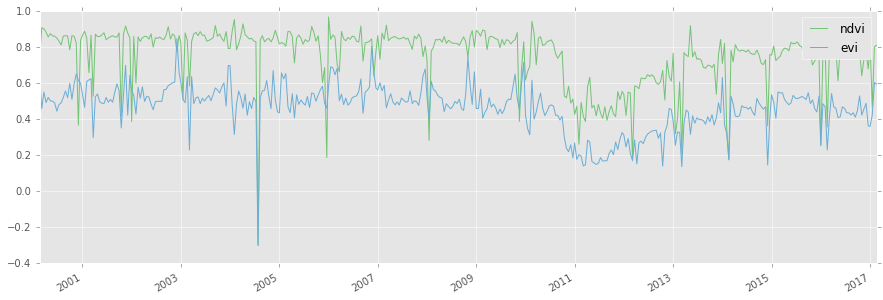

In [11]:
%matplotlib inline
import matplotlib
import pandas as pd
from wtss import wtss
from cycler import cycler
# get time series of MODIS data of this point
latitude  = -14.919100049
longitude = -59.11781088
# get time series
w = wtss("http://www.dpi.inpe.br/tws")
ts = w.time_series("mod13q1_512", ("ndvi", "evi"), latitude, longitude)
# build a data frame made of vegetation indexes
ndvi = pd.Series(ts["ndvi"], index = ts.timeline) * \
        cv_scheme['attributes']['ndvi']['scale_factor']
evi  = pd.Series(ts["evi"],  index = ts.timeline) * \
        cv_scheme['attributes']['evi']['scale_factor']
vidf = pd.DataFrame({'ndvi': ndvi, 'evi': evi})
# setup plot style
matplotlib.style.use('ggplot')
colors = cycler(u'color', [u'#74c476',u'#6baed6',u'#d62728', \
                           u'#ff7f0e', u'#756bb1'])
matplotlib.rcParams['axes.prop_cycle'] = colors
# plot
fig, ax = matplotlib.pyplot.subplots(figsize = (15, 5))
ax.plot()
vidf['ndvi'].plot()
vidf['evi'].plot()
ax.legend()
fig.autofmt_xdate()
# print first rows of the data frame
vidf[0:5]